<a href="https://colab.research.google.com/github/roshnintup-hash/TNSD/blob/main/Copy_of_Tesla_Stock_Prediction_LSTM_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print("Cell 2 worked")


Cell 2 worked


In [ ]:
import numpy as np
print(np.array([1,2,3]))


[1 2 3]


In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
!pip install yfinance


In [ ]:
import yfinance as yf
import pandas as pd


In [ ]:
data = yf.download(
    "TSLA",
    start="2025-01-19",
    end="2026-01-19"
)


/tmp/ipython-input-643288002.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2025-01-21,424.070007,433.200012,406.309998,432.640015,87320900
2025-01-22,415.109985,428.000000,414.589996,416.809998,60963300
2025-01-23,412.380005,420.730011,408.950012,416.059998,50690600
2025-01-24,406.579987,418.880005,405.779999,414.450012,56427100
2025-01-27,397.149994,406.690002,389.000000,394.799988,58125500


In [ ]:
data.to_csv("TSLA_data.csv")


In [ ]:
data.columns


MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [ ]:
close_data = data[['Close']]
close_data.head()


Price,Close
Ticker,TSLA
Date,
2025-01-21,424.070007
2025-01-22,415.109985
2025-01-23,412.380005
2025-01-24,406.579987
2025-01-27,397.149994


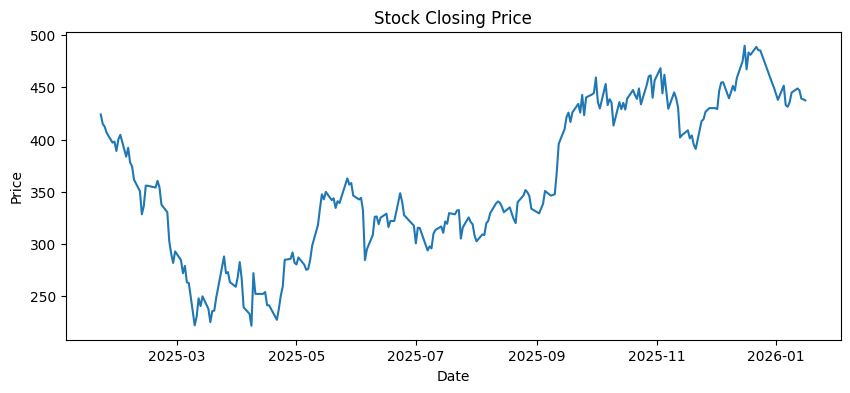

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(close_data)
plt.title("Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_data)


In [ ]:
X = []
y = []

for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])
    y.append(scaled_data[i])

import numpy as np
X, y = np.array(X), np.array(y)


In [ ]:
train_size = int(len(X) * 0.8)

X_train = X[:train_size]
X_test = X[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)


In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32
)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2742
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0281
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0366
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0152
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0213
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0109
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0124
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0111
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0090
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0093


In [ ]:
# Predict using the test data
predicted_prices = model.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


In [ ]:
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))


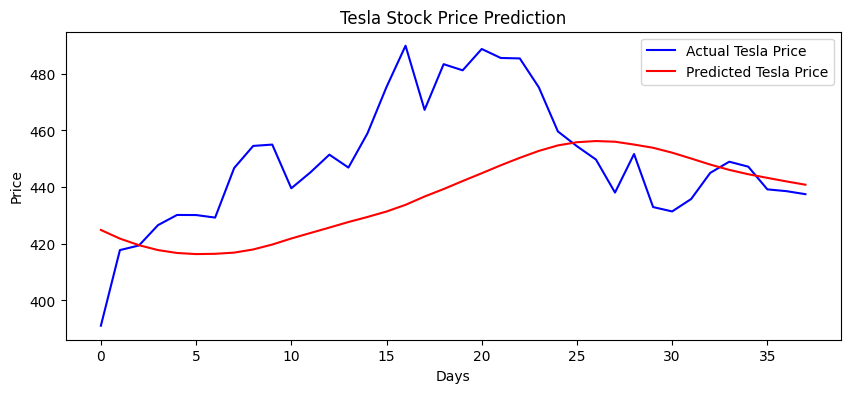

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(y_test_actual, color='blue', label='Actual Tesla Price')
plt.plot(predicted_prices, color='red', label='Predicted Tesla Price')
plt.title("Tesla Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_actual, predicted_prices)
print("Mean Squared Error:", mse)


Mean Squared Error: 632.0134852028599


In [ ]:
print("Project Completed Successfully")


Project Completed Successfully
